# Social Media Addicted Score Predication 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import joblib

In [2]:
#Load Dataset
df = pd.read_csv(r'Students Social Media Addiction.csv')

## EDA

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
df.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [7]:
df.shape

(705, 13)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,705.0,353.000000,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Avg_Daily_Usage_Hours,705.0,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Sleep_Hours_Per_Night,705.0,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,6.226950,1.105055,4.0,5.0,6.0,7.0,9.0
Conflicts_Over_Social_Media,705.0,2.849645,0.957968,0.0,2.0,3.0,4.0,5.0
Addicted_Score,705.0,6.436879,1.587165,2.0,5.0,7.0,8.0,9.0


In [10]:
df.drop('Student_ID', axis=1, inplace=True)


In [11]:
df['Country'].value_counts()

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

In [12]:
df['Academic_Level'].value_counts()

Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

In [13]:
df['Most_Used_Platform'].value_counts()

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64

In [14]:
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Visualization 

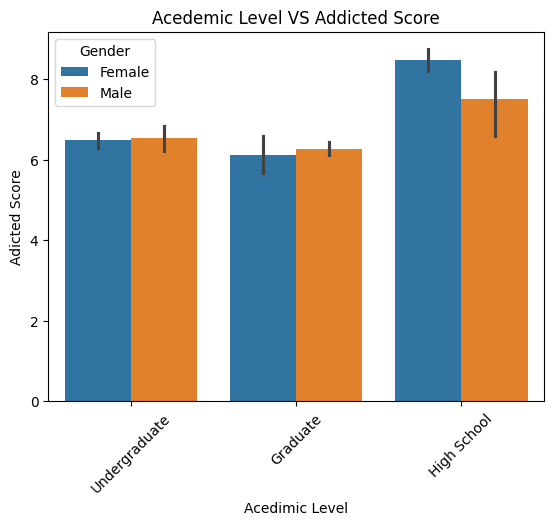

In [15]:
sns.barplot(data=df, x = 'Academic_Level', y='Addicted_Score', hue='Gender')
plt.title('Acedemic Level VS Addicted Score')
plt.xticks(rotation=45)
plt.xlabel('Acedimic Level')
plt.ylabel('Adicted Score')
plt.show()

Insights: High school student is more addicted than Undergraduate and Gradute student in social media

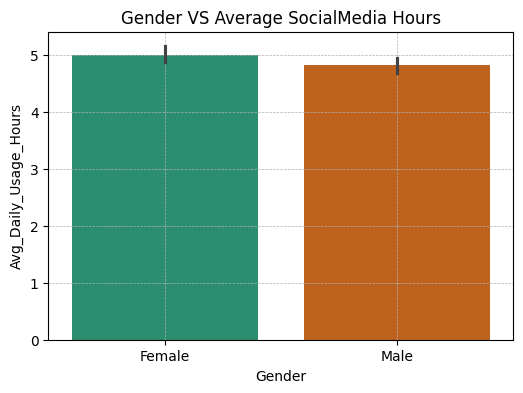

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Avg_Daily_Usage_Hours', hue='Gender', palette='Dark2')
plt.title('Gender VS Average SocialMedia Hours')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=1)
plt.show()

Insights: Male and Female both are used social media equally
 

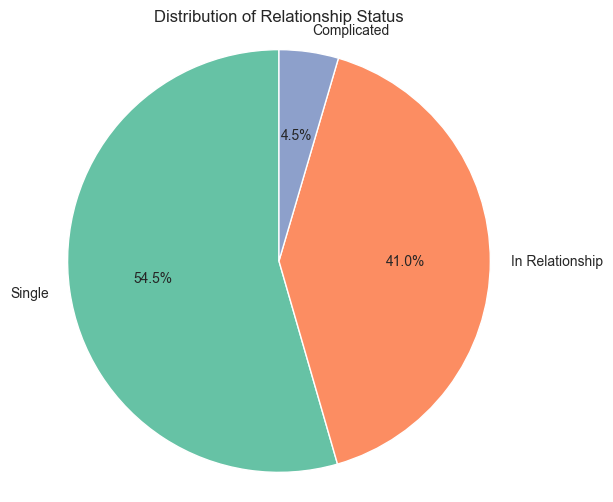

In [17]:
status_counts = df['Relationship_Status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(labels)))
plt.axis('equal')
plt.title('Distribution of Relationship Status')
plt.show()

Insights: In this dataset Single are more than in relationship and complicated relation

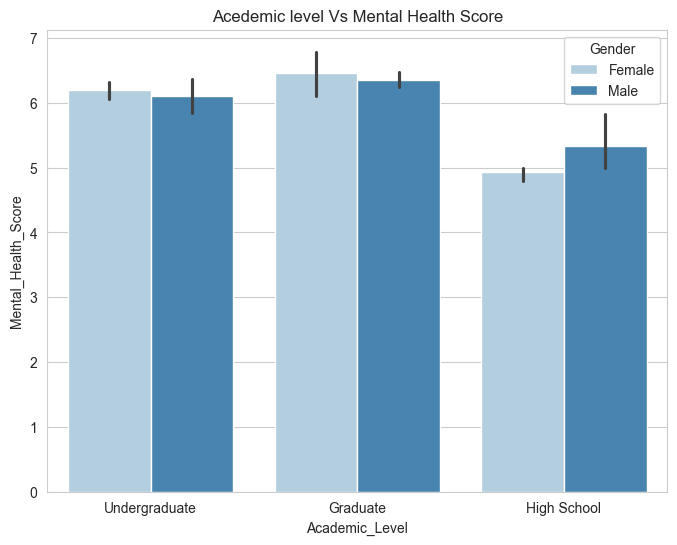

In [18]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(data=df, x="Academic_Level",y="Mental_Health_Score",hue="Gender",palette="Blues")
plt.title('Acedemic level Vs Mental Health Score')
plt.show()

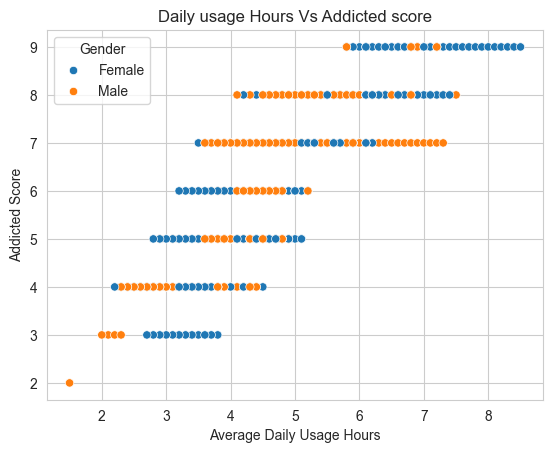

In [19]:
sns.scatterplot(data=df, x= 'Avg_Daily_Usage_Hours', y ='Addicted_Score', hue='Gender')
plt.title('Daily usage Hours Vs Addicted score')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Addicted Score')
plt.show()

Insights: Female are more addicted then male in social media and female used more than 8 hours a day

## Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
X = df.drop('Addicted_Score', axis=1)
y = df['Addicted_Score']

In [22]:
cat_cols = X.select_dtypes(['category', 'object']).columns.tolist()
num_cols = X.select_dtypes(['int64', 'float64']).columns.tolist()

In [23]:
cat_cols

['Gender',
 'Academic_Level',
 'Country',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Relationship_Status']

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat_cols', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [25]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [26]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Testing (ML)

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Avg_Daily_Usage_Hours',
                                                   'Sleep_Hours_Per_Night',
                                                   'Mental_Health_Score',
                                                   'Conflicts_Over_Social_Media']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Academic_Level',
                                                   'Country',
                                                   'Most_Used_Platform',
                                                   'Affects_Academic_Performance',
                                                   'Relationship_Status'])])),
                ('model', LinearRegression())])

In [28]:
#Predication of training dataset and testing dataset
y_pred_test = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)


In [29]:
# Error check 
# Test dataset
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Training dataset
mse_train = mean_absolute_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


In [30]:
#Accuracy and error check for testing dataset
print(' Model testing by ', pipeline.named_steps['model'])
print(f'MSE: {mse_test:.2f}')
print(f'MAE: {mae_test:.2f}')
print(f'R2 score: {r2_train:.2f}')

 Model testing by  LinearRegression()
MSE: 0.10
MAE: 0.22
R2 score: 0.98


In [31]:
# Accuracy and error check for training dataset 
print('Model Training by ', pipeline.named_steps['model'])
print(f'MSE: {mse_train:.2f}')
print(f'MAE: {mae_train:.2f}')
print(f'R2 Score: {r2_train:.2f}')

Model Training by  LinearRegression()
MSE: 0.14
MAE: 0.14
R2 Score: 0.98


### Visualization of Actual and Predication point

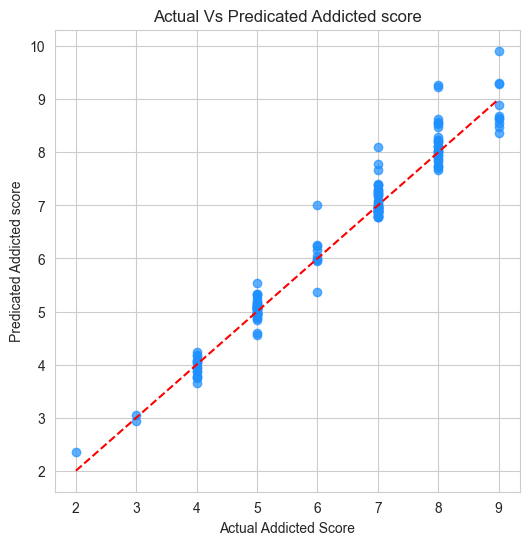

In [32]:
#Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Addicted Score')
plt.ylabel('Predicated Addicted score')
plt.title('Actual Vs Predicated Addicted score')
plt.show()

Insights: Perfectely aligned and  generalized model, both blue dot / actual and red line are predicated point had less error  

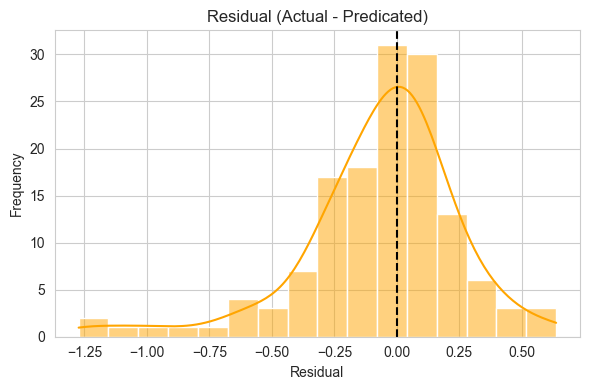

In [33]:
# Residual plot (Error Analysis)
residual = y_test - y_pred_test
plt.figure(figsize=(6, 4))
sns.histplot(residual, kde=True, color='orange')
plt.axvline(0, color='black', linestyle='--')
plt.title('Residual (Actual - Predicated)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

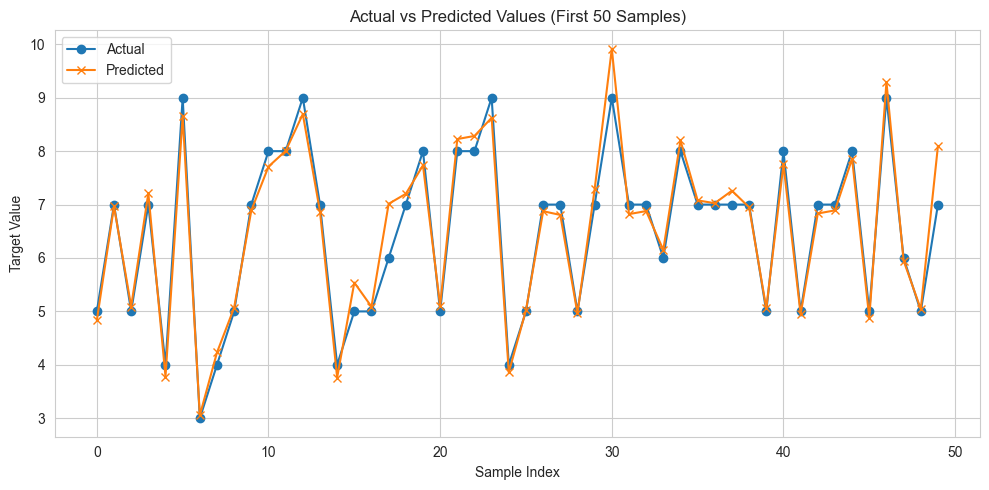

In [34]:
import matplotlib.pyplot as plt

# Line plot comparison: Actual vs Predicted
plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(y_test.values[:50], label='Actual', marker='o')

# Plot predicted values
plt.plot(y_pred_test[:50], label='Predicted', marker='x')

# Add title and labels
plt.title('Actual vs Predicted Values (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
joblib.dump(pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']